In [1]:
# Here we check the validity of the approximation in Appendix A of CNV-methods.pdf

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
from scipy.stats import gamma
from math import sqrt, exp, log
from scipy.special import gammaln
import scipy.special
import scipy.integrate as integrate

In [4]:
# alt minor likelihood of a alt counts and r ref counts 
# given bias ~ Gamma(alpha, beta) and minor allele fraction f
def exact_likelihood(bias, alpha, beta, f, a, r):
    gamma_dist = gamma(alpha, loc = 0, scale = 1/beta)
    prefactor = gamma_dist.pdf(bias)
    numerator = (f**a) * ((1-f)**r) * (bias**r)
    denominator = (f + (1-f)*bias)**(a+r)
    return prefactor * numerator / denominator

In [5]:
#the numerical integral over bias of the exact likelihood
def exact_likelihood_marginal(alpha, beta, f, a, r):
    return integrate.quad(lambda bias: exact_likelihood(bias, alpha, beta, f, a, r), 0, 10)[0]

In [6]:
def approximate_likelihood(bias, alpha, beta, f, a, r):
    n = a + r
    w = (1-f)*(a - alpha + 1) + beta*f
    lambda0 = (sqrt(w * w + 4 * beta * f * (1 - f) * (r + alpha - 1)) - w) / (2 * beta * (1 - f))
    
    y = (1 - f)/(f + (1 - f) * lambda0)
    kappa = n * y * y - (r + alpha - 1) / (lambda0 * lambda0);
    
    rho = 1 - kappa * lambda0 * lambda0
    tau = -kappa * lambda0
    
    logc = alpha*log(beta) - gammaln(alpha) + a * log(f) + r * log(1 - f) + (r + alpha - rho) * log(lambda0) + (tau - beta) * lambda0 - n * log(f + (1 - f) * lambda0)
    
    return exp(logc) * (bias ** (rho - 1)) * exp(-tau*bias)

In [7]:
#the analytic integral over bias of the approximate likelihood
def approximate_likelihood_marginal(alpha, beta, f, a, r):
    n = a + r
    w = (1-f)*(a - alpha + 1) + beta*f
    lambda0 = (sqrt(w * w + 4 * beta * f * (1 - f) * (r + alpha - 1)) - w) / (2 * beta * (1 - f))
    
    y = (1 - f)/(f + (1 - f) * lambda0);
    kappa = n * y * y - (r + alpha - 1) / (lambda0 * lambda0)
    
    rho = 1 - kappa * lambda0 * lambda0
    tau = -kappa * lambda0
    
    logc = alpha*log(beta) - gammaln(alpha) + a * log(f) + r * log(1 - f) + (r + alpha - rho) * log(lambda0) + (tau - beta) * lambda0 - n * log(f + (1 - f) * lambda0)
    
    return exp(logc + scipy.special.gammaln(rho) - rho * log(tau))

In [8]:
#we compare the approximate and exact distributions visually

In [9]:
def compare_plot(alpha, beta, f, a, r):
    bias = np.linspace(0, 2, 1000)
    f_exact = lambda bias: exact_likelihood(bias, alpha, beta, f, a, r)
    f_approx = np.vectorize(lambda bias: approximate_likelihood(bias, alpha, beta, f, a, r))
    exact = f_exact(bias)
    approx = f_approx(bias)
    plot(bias, exact)
    plot(bias, approx)

In [10]:
def compare_marginal(alpha, beta, f, a, r):
    exact = exact_likelihood_marginal(alpha, beta, f, a, r)
    approx = approximate_likelihood_marginal(alpha, beta, f, a, r)
    rel_error = (exact - approx)/exact
    return rel_error

(None, 0.0009085920076487772)

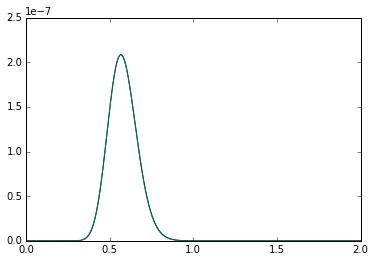

In [11]:
(compare_plot(40, 70, 0.3, 10, 15), compare_marginal(40, 70, 0.3, 10, 15))

(None, 0.002704597536605469)

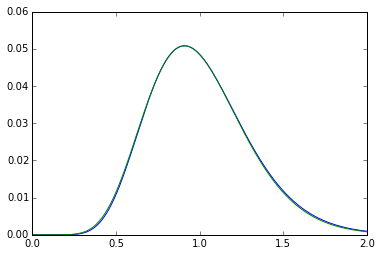

In [12]:
(compare_plot(10, 10, 0.1, 1, 9), compare_marginal(10, 10, 0.1, 1, 9))

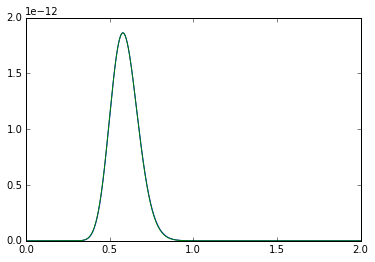

In [13]:
#just comparing plots now because the quadrature runs into numerical overflow issues that are dealt with by working in 
#log space int he Java code
compare_plot(40, 70, 0.5, 25, 17)

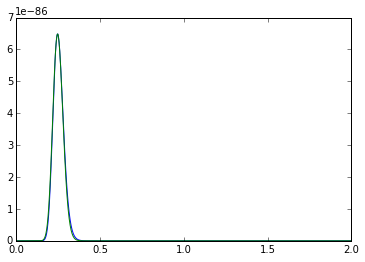

In [14]:
compare_plot(10, 10, 0.1, 100, 200)

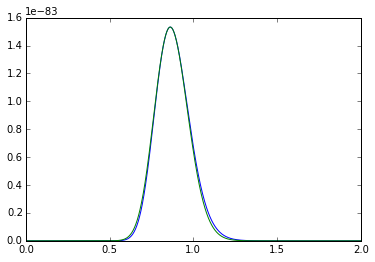

In [15]:
compare_plot(10, 10, 0.3, 100, 200)

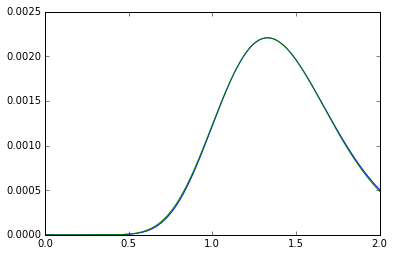

In [16]:
compare_plot(10, 10, 0.5, 0, 10)

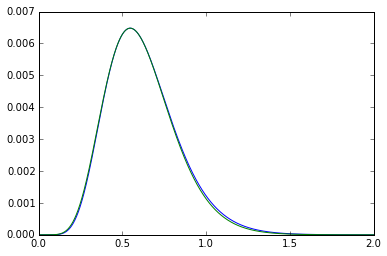

In [17]:
compare_plot(10, 10, 0.5, 10, 0)

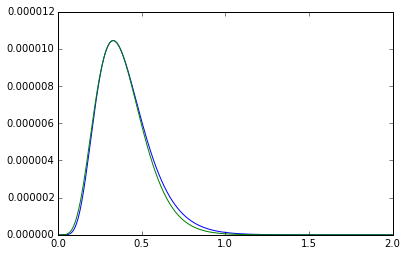

In [18]:
compare_plot(10, 10, 0.2, 10, 0)

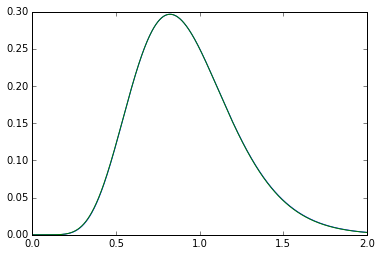

In [19]:
compare_plot(10, 10, 0.2, 1, 0)